In [1]:
import sys
sys.path.insert(0, '..')

from multipliers import RSRBinaryMultiplier, RSRTernaryMultiplier, NaiveMultiplier

import math
import numpy as np
import tracemalloc

In [2]:
def generate_random_binary_matrix(n):
    # Generate a random binary matrix of size n x n
    binary_matrix = np.random.randint(2, size=(n, n))
    return binary_matrix

def generate_random_ternary_matrix(n):
    ternary_matrix = np.random.randint(low=-1, high=2, size=(n, n))
    return ternary_matrix

def generate_random_int_vector(size, low=0, high=100):
    random_vector = np.random.randint(low, high, size)
    return random_vector

In [3]:
n_s = [2**i for i in range(11, 16)]

In [5]:
binary_matrices = [generate_random_binary_matrix(n) for n in n_s]

In [6]:
naive_usage = [NaiveMultiplier(A) for A in binary_matrices]
rsr_usage = [RSRBinaryMultiplier(A) for A in binary_matrices]

Filename: /home/mahdi/Projects/1BitNew/Notebooks/../multipliers.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    79  10997.1 MiB  10997.1 MiB           1       @profile
    80                                             def preprocess(self, k):
    81  10997.1 MiB      0.0 MiB           1           padding = (k - (self.n % k)) % k  # Padding to make divisible by k
    82                                         
    83  10997.1 MiB      0.0 MiB           1           if padding > 0:
    84  11029.1 MiB     32.1 MiB           1               A_padded = np.pad(self.A, ((0, 0), (0, padding)), mode='constant')
    85                                                 else:
    86                                                     A_padded = self.A
    87                                         
    88  11029.1 MiB      0.0 MiB           1           blocks_permutations = []
    89                                         
    90  11037.7 MiB      0.0 MiB         294         

In [7]:
naive_binary_memory = [sys.getsizeof(A) / (1024 ** 2) for A in binary_matrices]

In [8]:
naive_binary_memory

[32.0001220703125,
 128.0001220703125,
 512.0001220703125,
 2048.0001220703125,
 8192.000122070312]

In [9]:
rsr_memory_final = [9.01, 40.26, 146.04, 526.6, 1915.85]

In [10]:
rsr_memory_peak = [n + a for n,a in zip(naive_binary_memory, rsr_memory_final)]

In [11]:
rsr_memory_final, naive_binary_memory

([9.01, 40.26, 146.04, 526.6, 1915.85],
 [32.0001220703125,
  128.0001220703125,
  512.0001220703125,
  2048.0001220703125,
  8192.000122070312])

In [12]:
ratio = [r/n for r,n in zip(rsr_memory_final, naive_binary_memory)]

In [13]:
ratio

[0.2815614259283984,
 0.3145309500399112,
 0.2852343069948418,
 0.2571288909239238,
 0.23386840471821418]

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import LogLocator

In [15]:
binary_df = pd.DataFrame({"rsr_final": rsr_memory_final,"rsr_peak": rsr_memory_peak, "naive": naive_binary_memory, "ratio": ratio, "vector_lengths": n_s})

In [20]:
def plot(df, filename: str):
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")

    plt.rcParams['font.family'] = 'serif'  # Set font to Times New Roman
    plt.rcParams['text.color'] = 'black'  # Set text color to black
    plt.rcParams['axes.labelcolor'] = 'black'  # Set axis labels color to black
    plt.rcParams['xtick.color'] = 'black'  # Set x-tick color to black
    plt.rcParams['ytick.color'] = 'black'  # Set y-tick color to black
    plt.rcParams['axes.edgecolor'] = 'black'  # Set axes edge color to black
    plt.rcParams['axes.titleweight'] = 'bold'  # Bold title for emphasis

    vector_lengths = df['vector_lengths']  # Length of each vector
    speedup = df['ratio']
    naive_times = df['naive']
    rsr_current = df['rsr_final']
    rsr_peak = df['rsr_peak']
    # Create the plot with improved aesthetics
    # plt.figure(figsize=(12, 6))
    plt.figure(figsize=(10, 6))


    # Plot times for NaiveMultiplier and RSRMultiplier
    plt.plot(vector_lengths, naive_times, label='Naive Multiplier', marker='o', color='steelblue')
    plt.plot(vector_lengths, rsr_current, label='RSR Multiplier (final usage)', marker='o', color='darkorange')
    plt.plot(vector_lengths, rsr_peak, label='RSR Multiplier (peak usage)', marker='o', color='purple')


    # Draw lines connecting Naive and RSR times for each vector length to show speedup visually
    for i in range(len(vector_lengths)):
        plt.plot([vector_lengths[i], vector_lengths[i]], [naive_times[i], rsr_current[i]], 
                color='gray', linestyle='--')

    # Label the points with the speedup factor
    for i, length in enumerate(vector_lengths):
        plt.text(length, (naive_times[i] + rsr_current[i]) / 2, f"{speedup[i]:.2f}x",
                ha='left', va="top", color='red')

    # Configure the plot aesthetics
    plt.xscale('log', base=2)
    # plt.yscale('log', base=2)

    plt.xlabel('$n$ (log scale, base 2)')
    plt.ylabel('Memory Usage (MB)')
    # plt.title('Comparison of Naive and RSR Multiplication Methods', fontsize=18, pad=20)
    plt.legend(fontsize=14)

    # Configure x-axis ticks for log base 2 and a clean grid
    plt.gca().xaxis.set_major_locator(LogLocator(base=2))
    plt.grid(True, which="both", ls="--", lw=0.5, color='gray', alpha=0.7)

    # Save as EPS and display
    plt.savefig(f"{filename}.eps", format='eps', bbox_inches='tight')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


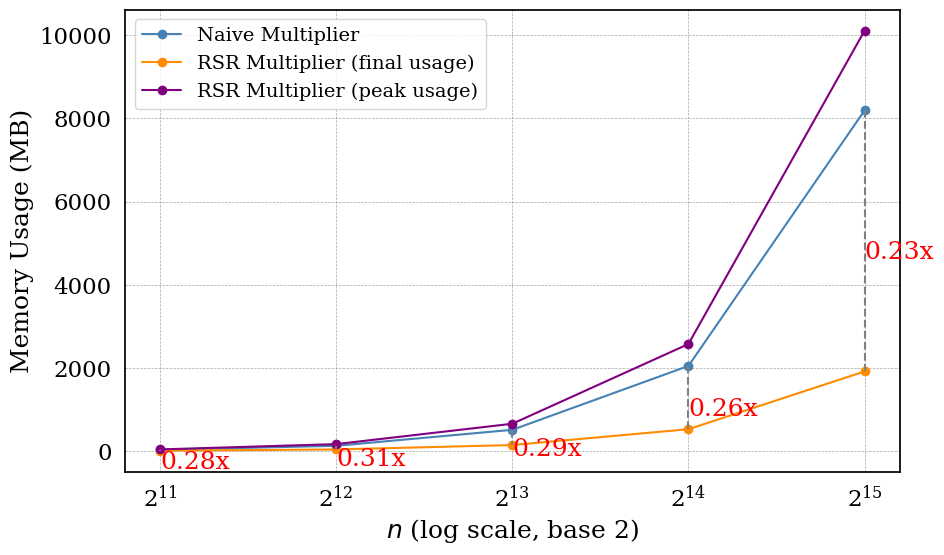

In [21]:
plot(binary_df, "memory_binary")